# EDA Sephora Dataset

https://www.kaggle.com/datasets/dominoweir/skincare-product-ingredients

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
path = "D:/Documents-D/datasets/dermis"
df = pd.read_csv(f"{path}/sephora.csv")
print(len(df))
df.head()

1472


,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [3]:
# no nos interesa tanto
df.drop(columns=['price'], inplace=True)

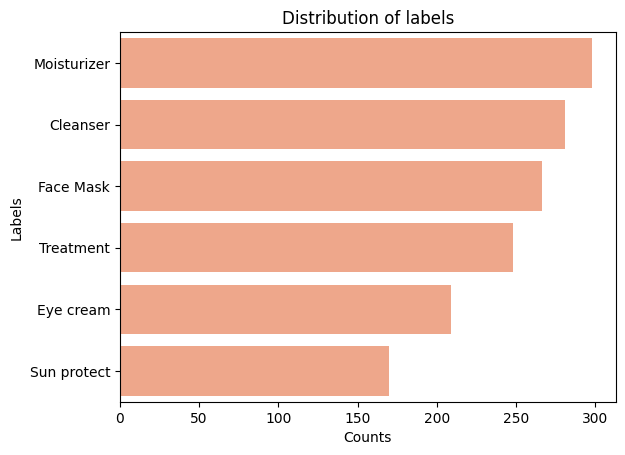

In [4]:
# Cuántos productos son de cada categoría (moisturizer, cleanser, etc.)
label_counts = df['Label'].value_counts()
sns.barplot(y=label_counts.index, x=label_counts.values, color='lightsalmon')
plt.title("Distribution of labels")
plt.xlabel("Counts")
plt.ylabel("Labels")
plt.show()

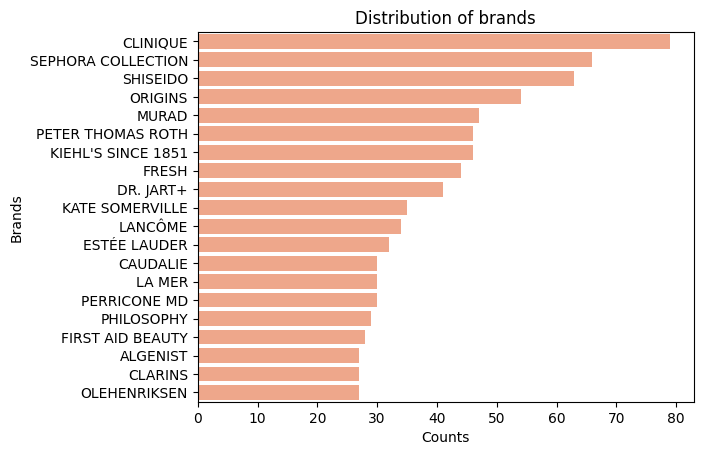

In [5]:
# Cuántos productos son de cada marca (Clinique, Lancome, etc.)
brand_counts = df['brand'].value_counts().head(20)
sns.barplot(y=brand_counts.index, x=brand_counts.values, color='lightsalmon')
plt.title("Distribution of brands")
plt.xlabel("Counts")
plt.ylabel("Brands")
plt.show()

In [6]:
# pasar ingredientes a lista
df.ingredients = df.ingredients.str.lower().str.split(",")
df.ingredients = df.ingredients.apply(lambda x: [i.strip() for i in x])

# cantidad de ingredientes únicos
unique_ingredients = set()
for ingredients_list in df['ingredients']:
    unique_ingredients.update(ingredients_list)

num_unique_ingredients = len(unique_ingredients)
num_unique_ingredients

6134

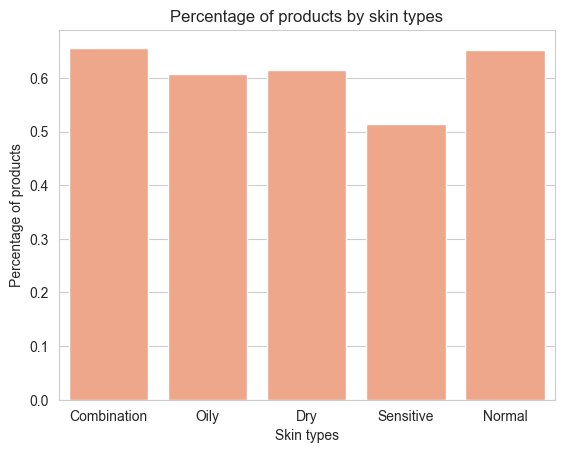

In [7]:
# cuántos productos por tipo de piel
type_counts = df[['Combination', 'Oily', 'Dry', 'Sensitive', 'Normal']].sum()
type_counts /= len(df)
sns.set_style("whitegrid")
sns.barplot(x=type_counts.index, y=type_counts.values, color='lightsalmon')
plt.title("Percentage of products by skin types")
plt.xlabel("Skin types")
plt.ylabel("Percentage of products")
plt.show()

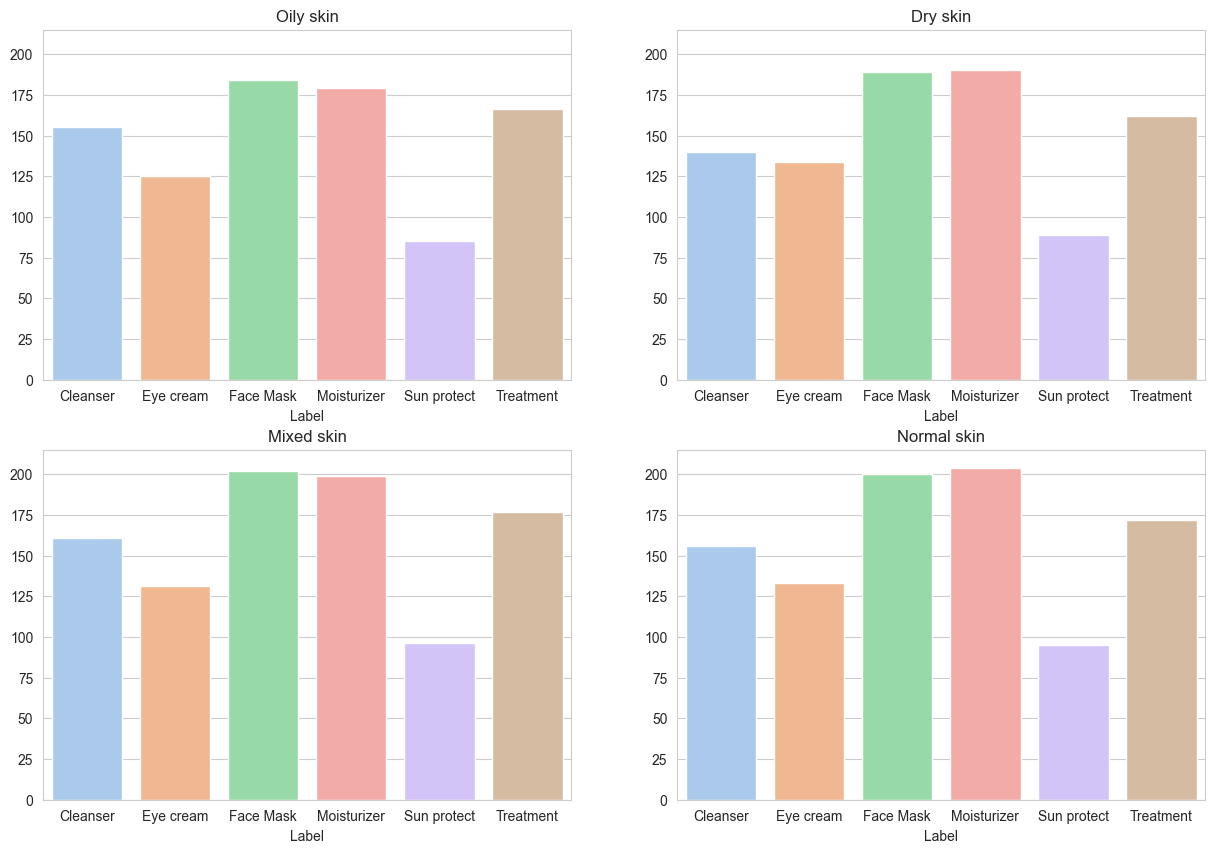

In [8]:
# para cada tipo de piel, cuántos productos de cada tipo (label) hay?
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

oily = df[df['Oily'] == 1]
oily_counts = oily['Label'].value_counts().sort_index()
sns.barplot(x=oily_counts.index, y=oily_counts.values, hue = oily_counts.index, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title("Oily skin")

dry = df[df['Dry'] == 1]
dry_counts = dry['Label'].value_counts().sort_index()
sns.barplot(x=dry_counts.index, y=dry_counts.values, hue=dry_counts.index, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title("Dry skin")

mixed = df[df['Combination'] == 1]
mixed_counts = mixed['Label'].value_counts().sort_index()
sns.barplot(x=mixed_counts.index, y=mixed_counts.values, hue=mixed_counts.index, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title("Mixed skin")

normal = df[df['Normal'] == 1]
normal_counts = normal['Label'].value_counts().sort_index()
sns.barplot(x=normal_counts.index, y=normal_counts.values, hue=normal_counts.index, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title("Normal skin")

for ax in axes.flat:
    ax.set_ylim(0, 215)

plt.show()

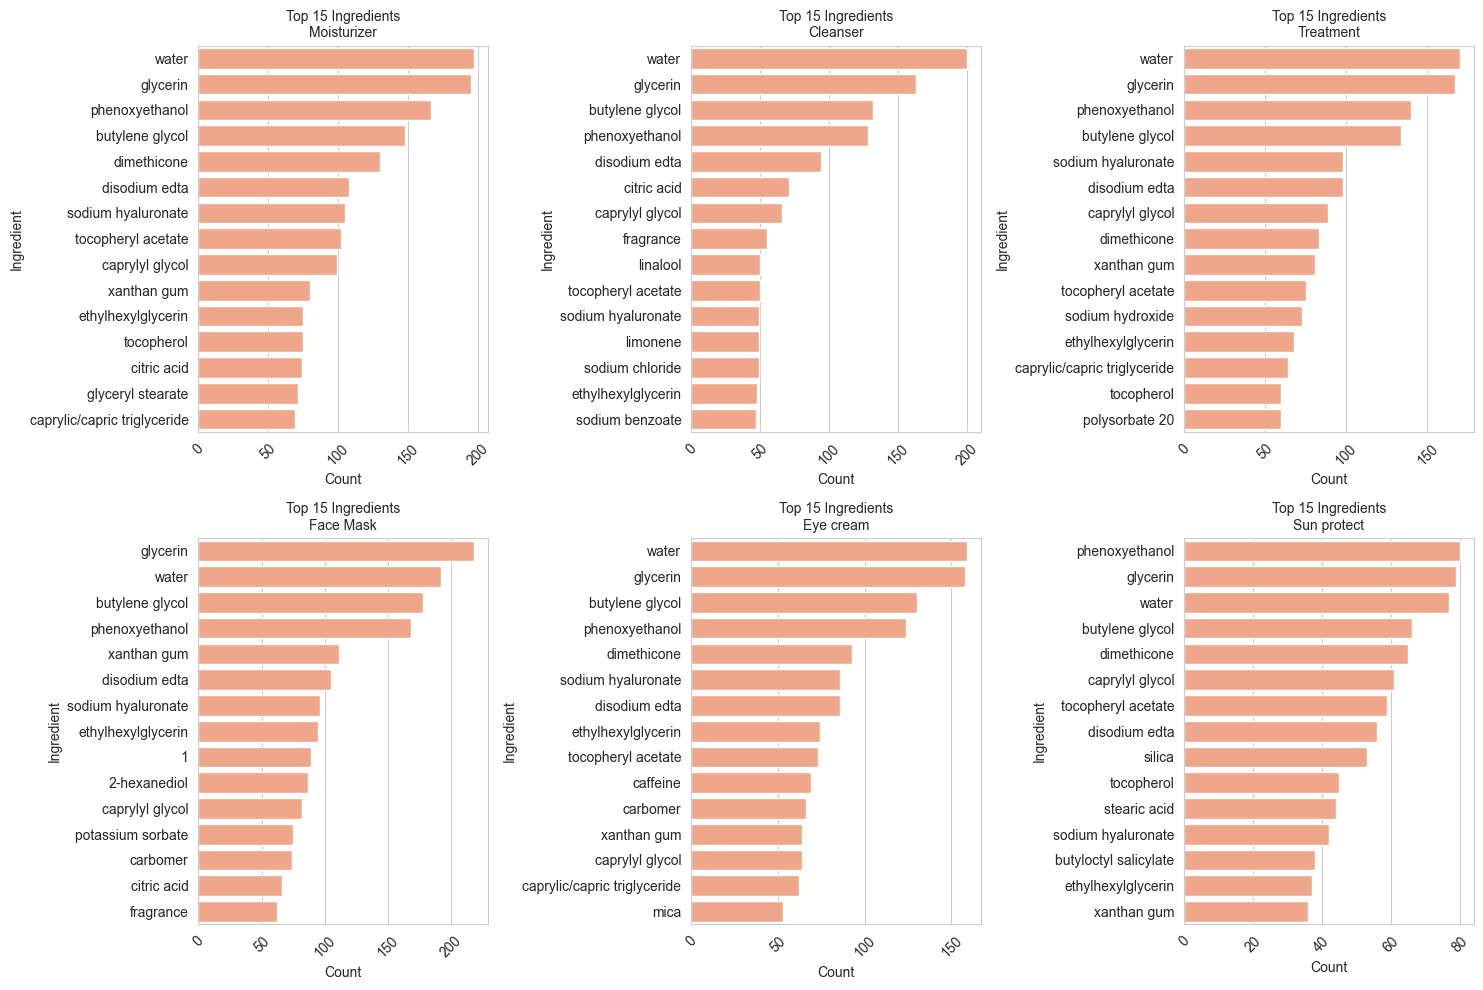

In [14]:
# Top k ingredientes por cada tipo de producto (moisturizer, cleanser, etc.)
topk = 15
product_types = df['Label'].unique()

fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # 2 x 7
axes = axes.flatten()

for i, product_type in enumerate(product_types):
    product_type_ingredients = df[df.Label == product_type].ingredients.explode().str.strip()
    ingredient_counts = Counter(product_type_ingredients)
    ingredient_counts_df = pd.DataFrame(ingredient_counts.items(), columns=['Ingredient', 'Count']).sort_values(by='Count', ascending=False)
    
    sns.barplot(x='Count', y='Ingredient', data=ingredient_counts_df.head(topk), ax=axes[i], color="lightsalmon")
    axes[i].set_title(f"Top {topk} Ingredients\n{product_type}", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

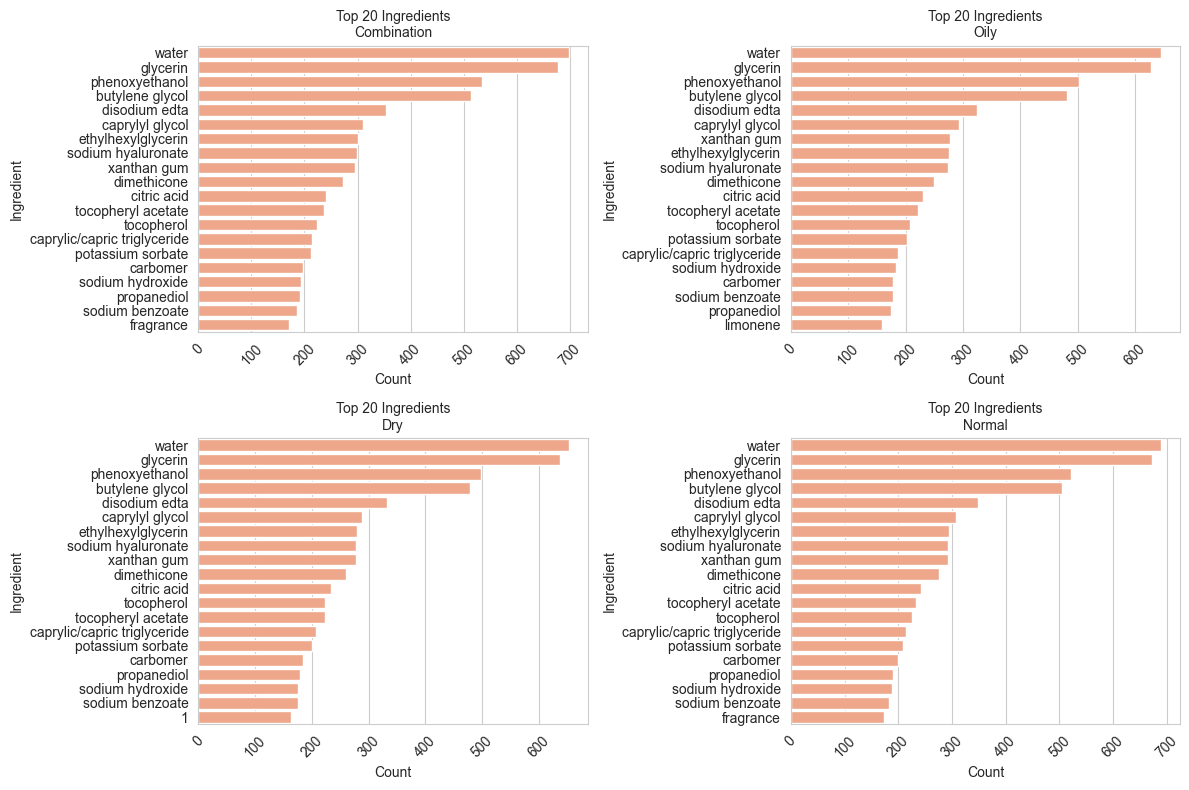

In [10]:
# Top k ingredientes presentes en productos según el tipo de piel
topk = 20
skin_types = ['Combination', 'Oily', 'Dry', 'Normal']

fig, axes = plt.subplots(2, 2, figsize=(12, 8)) # 2 x 2
axes = axes.flatten()

for i, skin_type in enumerate(skin_types):
    skin_type_ingredients = df[df[skin_type] == 1].ingredients.explode().str.strip()
    ingredient_counts = Counter(skin_type_ingredients)
    ingredient_counts_df = pd.DataFrame(ingredient_counts.items(), columns=['Ingredient', 'Count']).sort_values(by='Count', ascending=False)
    
    sns.barplot(x='Count', y='Ingredient', data=ingredient_counts_df.head(topk), ax=axes[i], color="lightsalmon")
    axes[i].set_title(f"Top {topk} Ingredients\n{skin_type}", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [16]:
# cada ingrediente se junta con un guion bajo
# por ejemplo, "sodium hyaluronate" se convierte en "sodium_hyaluronate"

df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['ingredients_str'])

le = LabelEncoder()
y = le.fit_transform(df['Label']) 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# ¿Se puede predecir la categoría (moisturizer, cleanser, etc.) en base a los ingredientes? Usando un random forest
clf = RandomForestClassifier(max_depth=20, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5016949152542373
              precision    recall  f1-score   support

           0       0.68      0.65      0.66        65
           1       0.62      0.27      0.37        49
           2       0.59      0.58      0.59        55
           3       0.31      0.53      0.39        55
           4       0.64      0.58      0.61        24
           5       0.42      0.38      0.40        47

    accuracy                           0.50       295
   macro avg       0.54      0.50      0.50       295
weighted avg       0.54      0.50      0.50       295

